In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chi2_contingency, ttest_ind

In [4]:
# Load dataset
df = pd.read_csv('Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [75]:
# Check missing values
df.isnull().sum()


RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [76]:
# Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [77]:
# Summary stats for categorical variables
df.describe(include='object')


,Surname,Geography,Gender,Card Type
count,10000,10000,10000,10000
unique,2932,3,2,4
top,Smith,France,Male,DIAMOND
freq,32,5014,5457,2507


In [78]:
# Summary stats for numeric variables
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [79]:
# Drop unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)


In [80]:
# Preview cleaned data
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [81]:
# Replace binary values with Yes/No
df['HasCrCard'].replace({0:'No',1:'Yes'}, inplace=True)


In [82]:
# Replace binary values with Yes/No (other columns)
df['IsActiveMember'].replace({0:'No',1:'Yes'}, inplace=True)
df['Exited'].replace({0:'No',1:'Yes'}, inplace=True)
df['Complain'].replace({0:'No',1:'Yes'}, inplace=True)


In [83]:
# Preview updated categorical columns
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


In [84]:
# Value counts of key categorical variables
columns = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember',
           'Exited','Complain','Satisfaction Score','Card Type']
for col in columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())



Value counts for Geography:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Value counts for Gender:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64

Value counts for NumOfProducts:
 NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

Value counts for HasCrCard:
 HasCrCard
Yes    7055
No     2945
Name: count, dtype: int64

Value counts for IsActiveMember:
 IsActiveMember
Yes    5151
No     4849
Name: count, dtype: int64

Value counts for Exited:
 Exited
No     7962
Yes    2038
Name: count, dtype: int64

Value counts for Complain:
 Complain
No     7956
Yes    2044
Name: count, dtype: int64

Value counts for Satisfaction Score:
 Satisfaction Score
3    2042
2    2014
4    2008
5    2004
1    1932
Name: count, dtype: int64

Value counts for Card Type:
 Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64


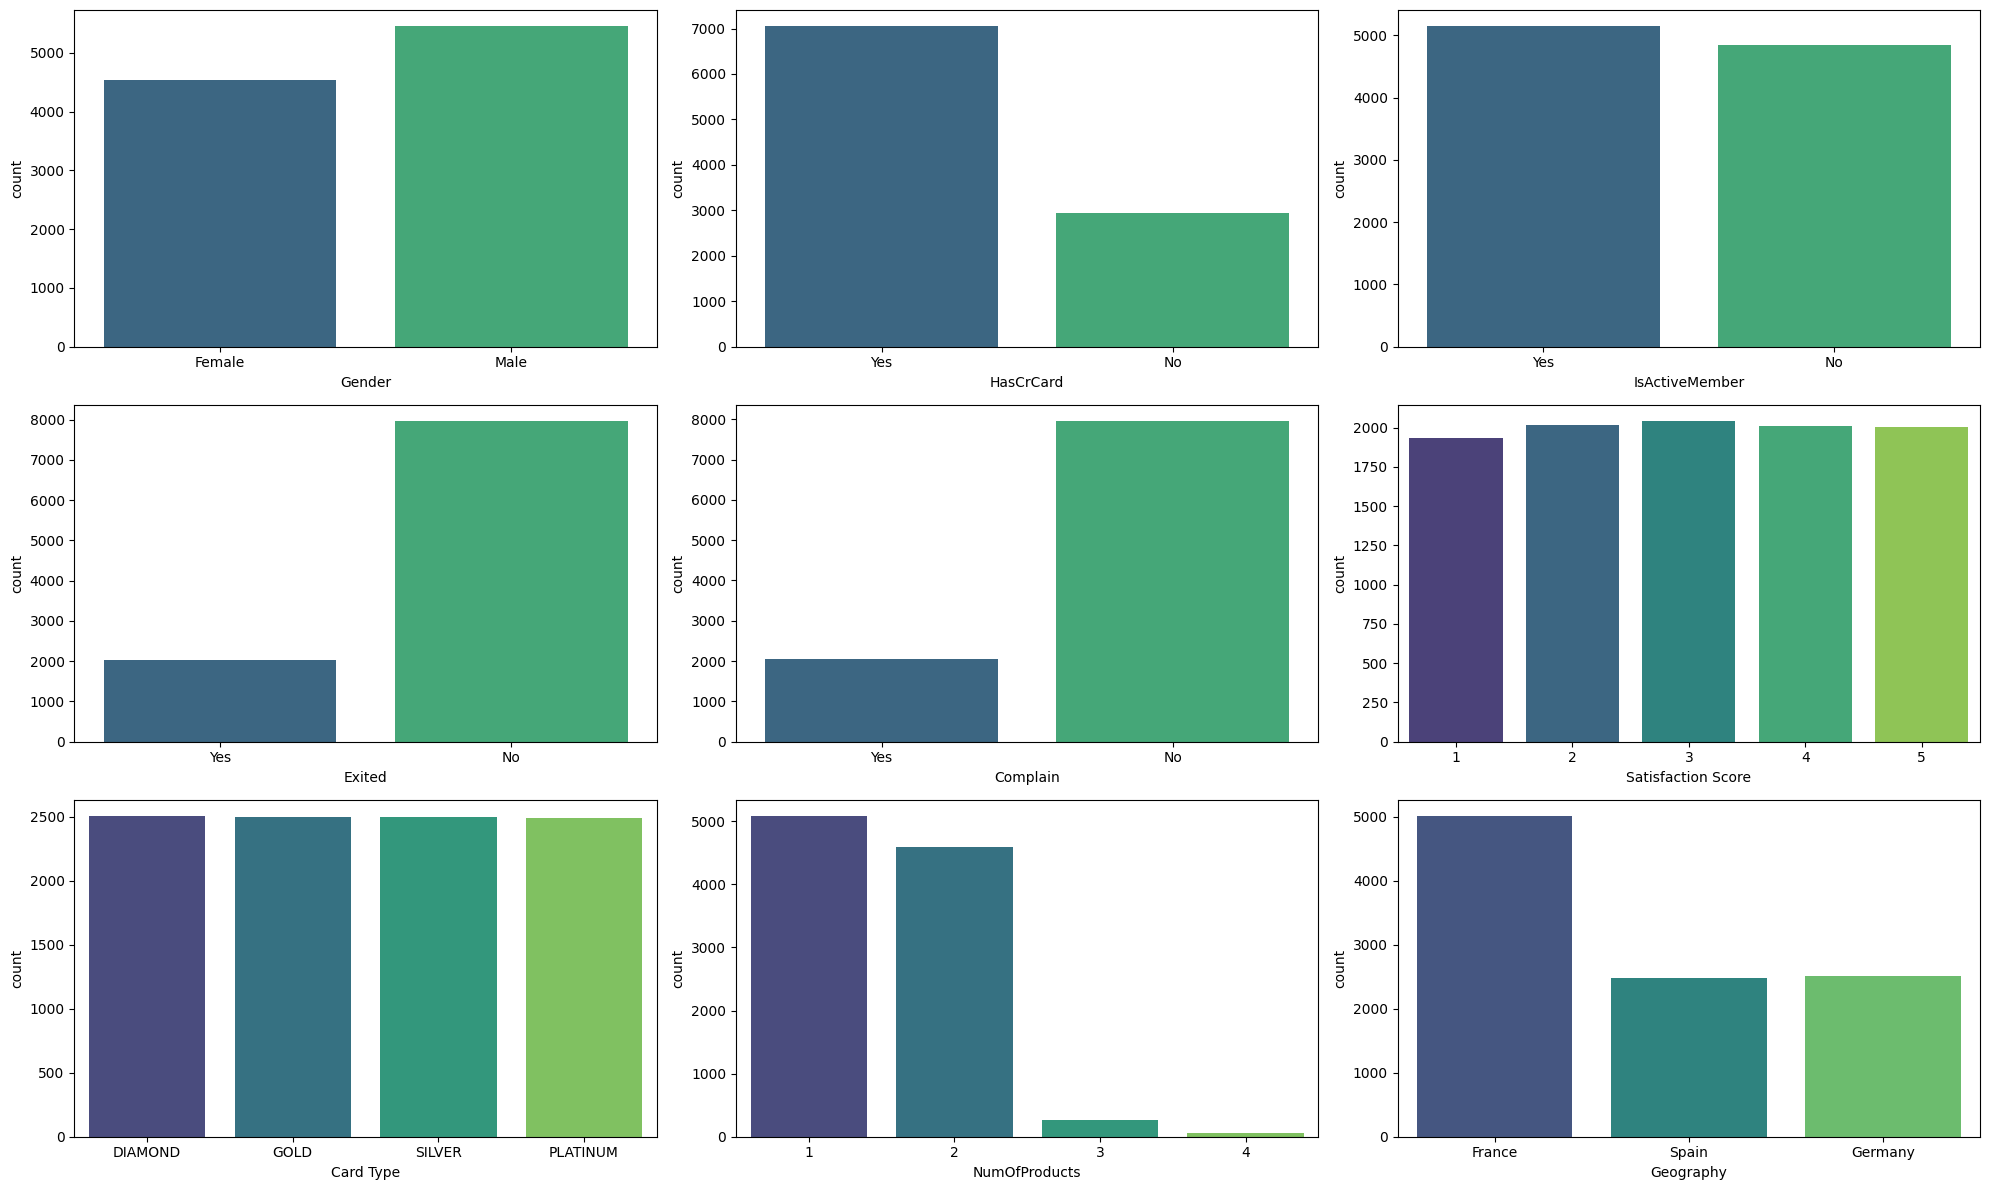

In [85]:
# Countplots of categorical features
fig, axs = plt.subplots(3,3,figsize=(20,12))
sns.countplot(data=df, x='Gender', ax=axs[0,0], palette='viridis')
sns.countplot(data=df, x='HasCrCard', ax=axs[0,1], palette='viridis')
sns.countplot(data=df, x='IsActiveMember', ax=axs[0,2], palette='viridis')
sns.countplot(data=df, x='Exited', ax=axs[1,0], palette='viridis')
sns.countplot(data=df, x='Complain', ax=axs[1,1], palette='viridis')
sns.countplot(data=df, x='Satisfaction Score', ax=axs[1,2], palette='viridis')
sns.countplot(data=df, x='Card Type', ax=axs[2,0], palette='viridis')
sns.countplot(data=df, x='NumOfProducts', ax=axs[2,1], palette='viridis')
sns.countplot(data=df, x='Geography', ax=axs[2,2], palette='viridis')
plt.tight_layout()
plt.show()


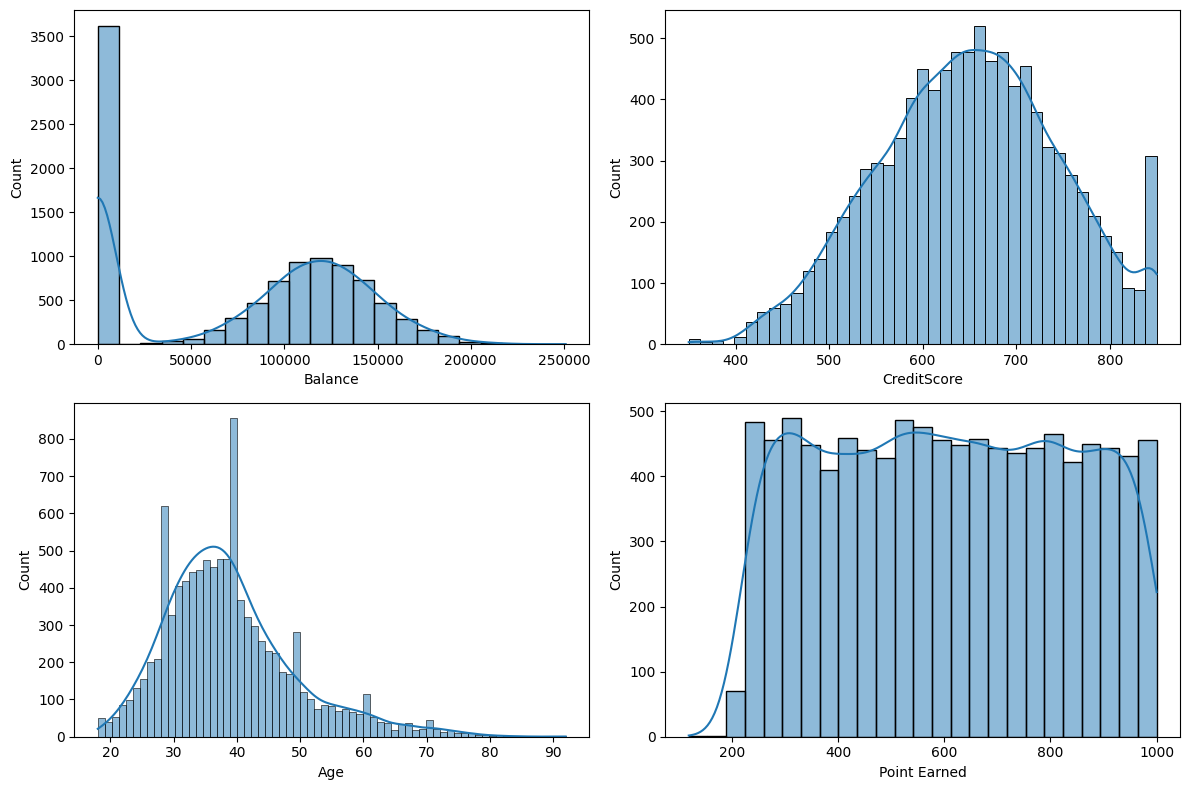

In [21]:
# Histograms of numeric variables
fig, axs = plt.subplots(2,2,figsize=(12,8))
sns.histplot(df['Balance'], kde=True, ax=axs[0,0])
sns.histplot(df['CreditScore'], kde=True, ax=axs[0,1])
sns.histplot(df['Age'], kde=True, ax=axs[1,0])
sns.histplot(df['Point Earned'], kde=True, ax=axs[1,1])
plt.tight_layout()
plt.show()


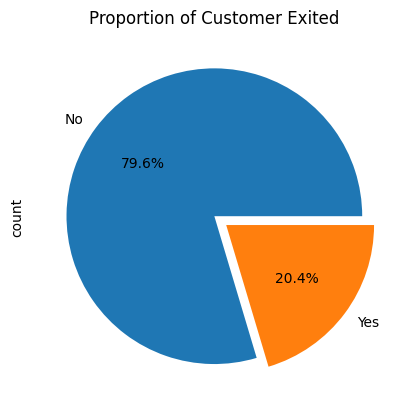

In [86]:
# Pie chart of churn
df['Exited'].value_counts().plot.pie(autopct='%.1f%%', explode=(0,0.1))
plt.title('Proportion of Customer Exited')
plt.show()


In [87]:
# Preview
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


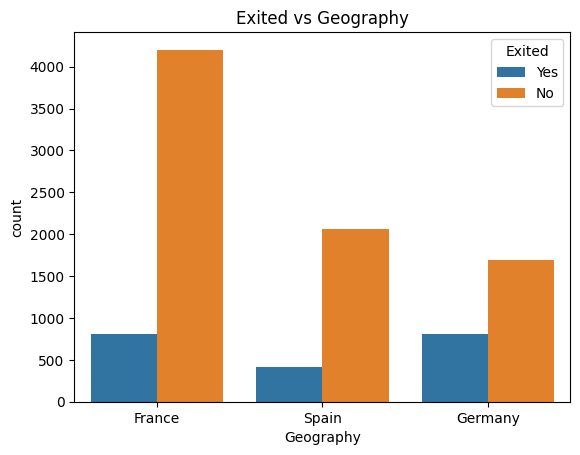

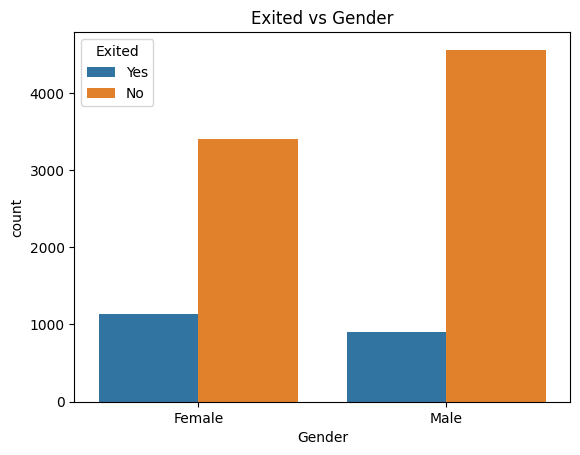

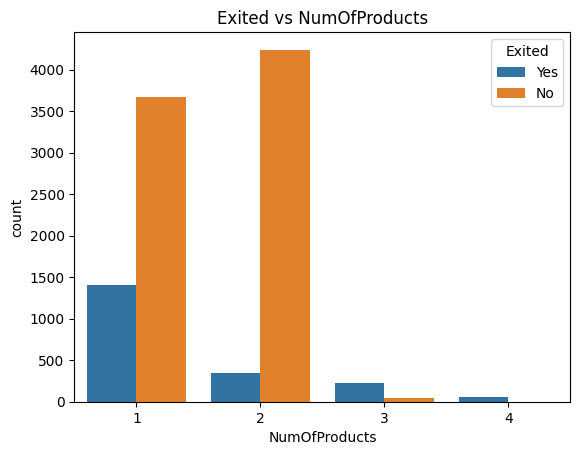

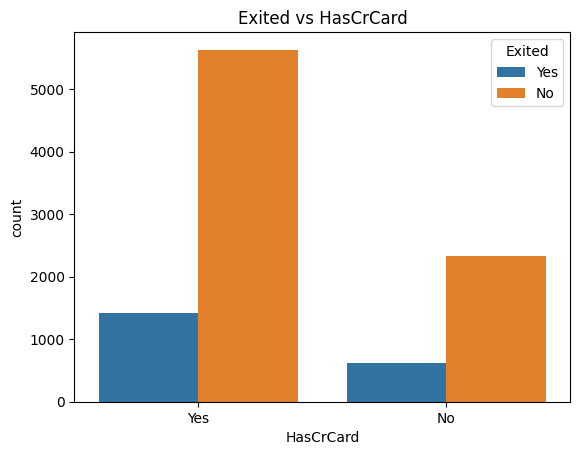

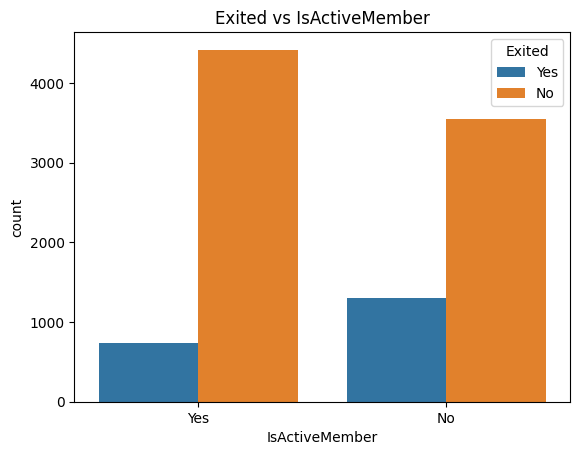

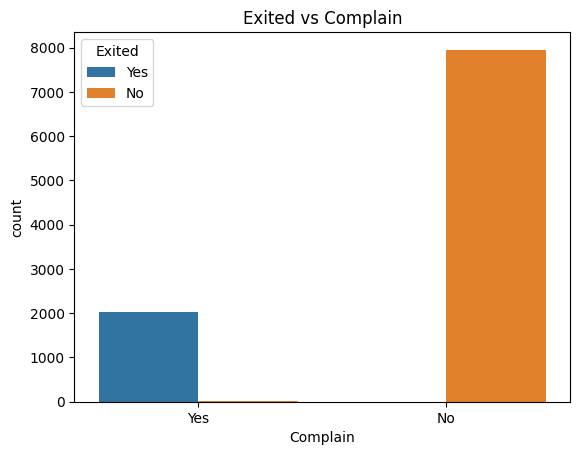

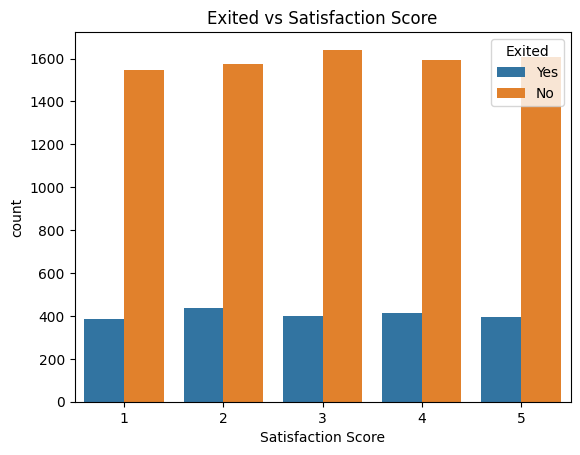

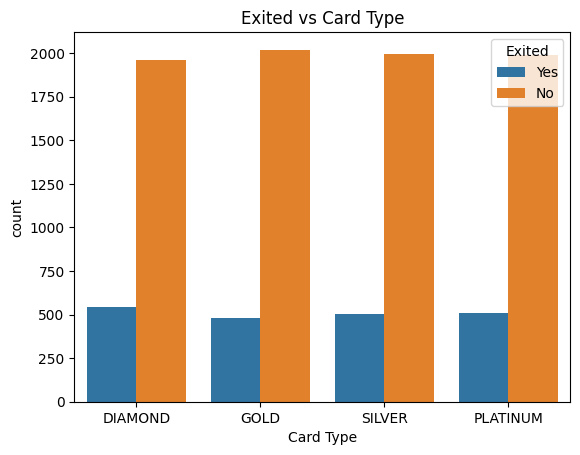

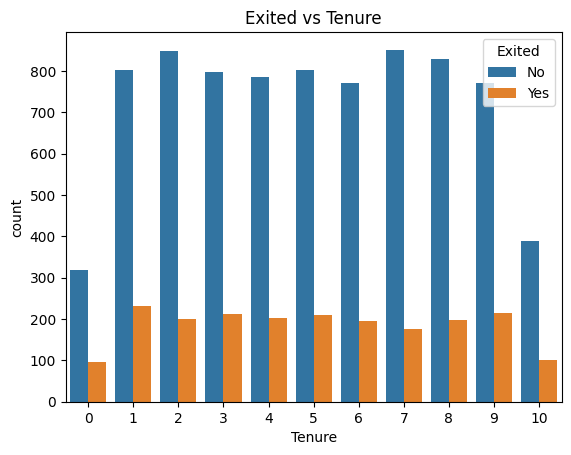

In [88]:
# Countplots of churn vs categorical variables
s = ['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember',
     'Complain','Satisfaction Score','Card Type','Tenure']
for i in s:
    sns.countplot(data=df, x=i, hue='Exited')
    plt.title(f'Exited vs {i}')
    plt.show()


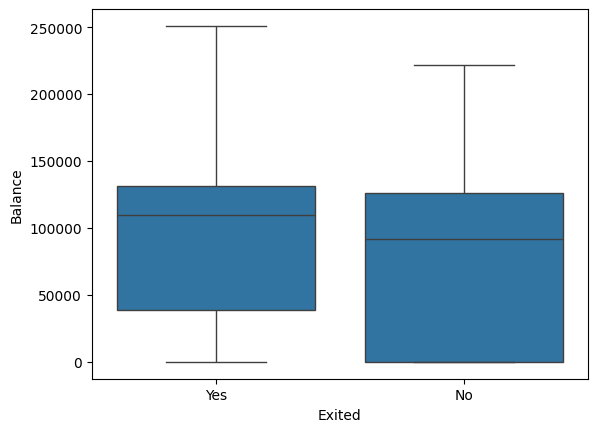

In [89]:
# Boxplot Balance vs Exited
sns.boxplot(data=df, x='Exited', y='Balance')
plt.show()


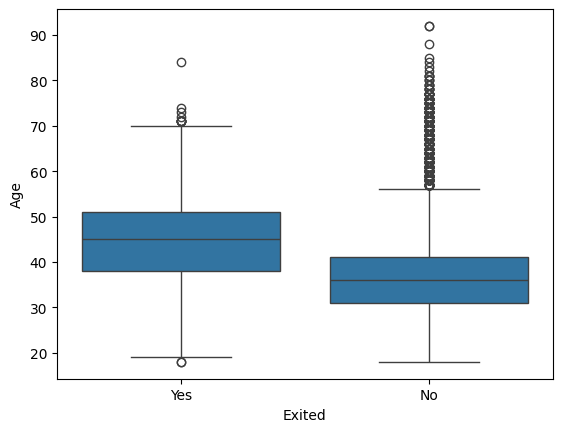

In [90]:
# Boxplot Age vs Exited
sns.boxplot(data=df, x='Exited', y='Age')
plt.show()


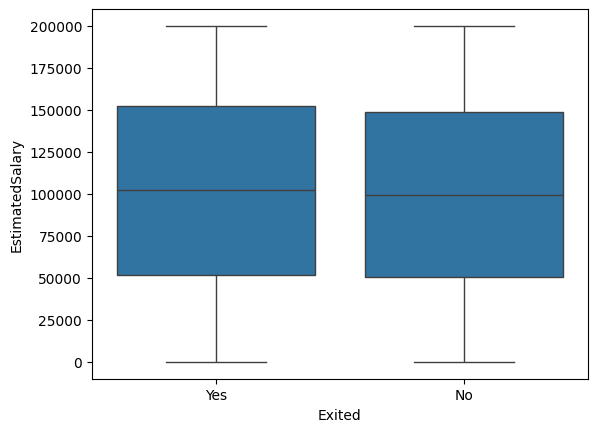

In [91]:
# Boxplot Salary vs Exited
sns.boxplot(data=df, x='Exited', y='EstimatedSalary')
plt.show()


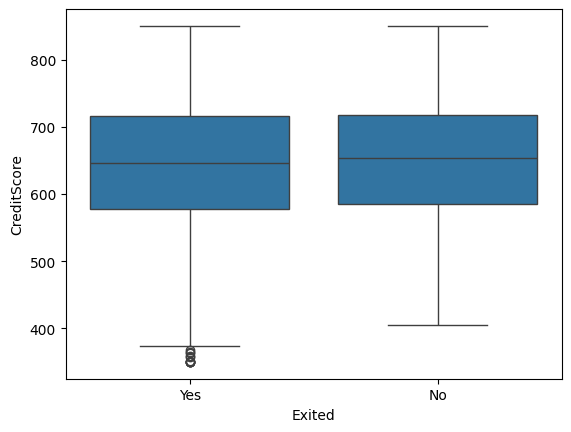

In [92]:
# Boxplot CreditScore vs Exited
sns.boxplot(data=df, x='Exited', y='CreditScore')
plt.show()


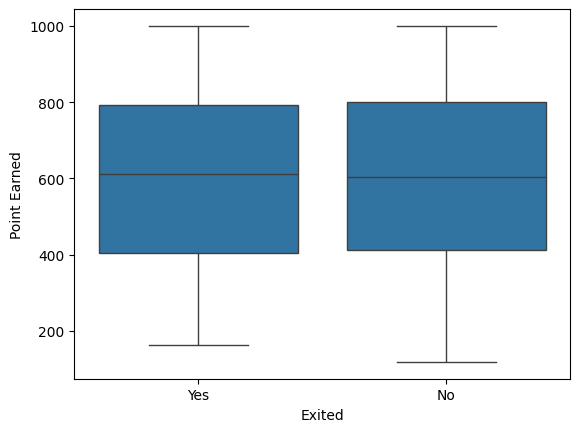

In [93]:
# Boxplot Points vs Exited
sns.boxplot(data=df, x='Exited', y='Point Earned')
plt.show()


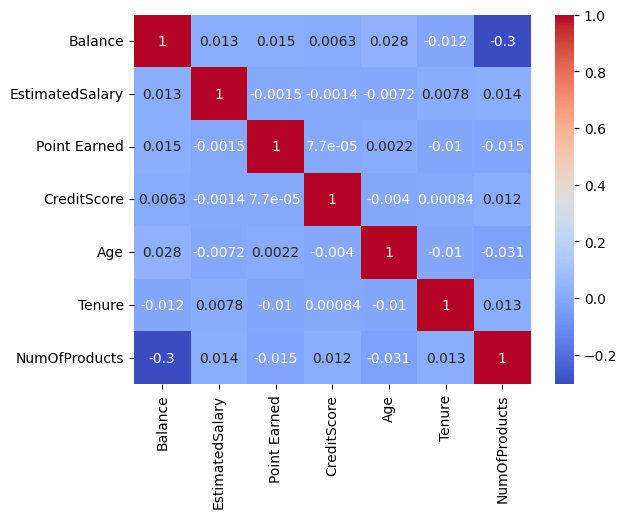

In [94]:
# Correlation heatmap of numeric features
num_cols = ['Balance','EstimatedSalary','Point Earned','CreditScore','Age','Tenure','NumOfProducts']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


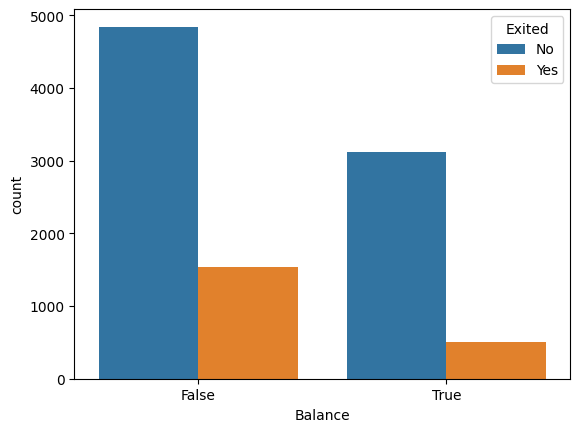

In [95]:
# Churn vs Zero Balance
sns.countplot(x=(df['Balance']==0), hue='Exited', data=df)
plt.show()


In [96]:
# Total churned with zero balance
((df['Balance']==0) & (df['Exited']=='Yes')).sum()


np.int64(500)

In [97]:
# Preview
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Yes,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Yes,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Yes,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,No,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,No,5,GOLD,425


In [98]:
# Encode Exited to numeric (for churn rate analysis)
df['Exited'] = df['Exited'].map({'No':0,'Yes':1})


In [99]:
# Geography-wise churn rate
df.groupby('Geography')['Exited'].mean()*100


Geography
France     16.174711
Germany    32.443204
Spain      16.673395
Name: Exited, dtype: float64

In [100]:
# Gender-wise churn rate
df.groupby('Gender')['Exited'].mean()*100


Gender
Female    25.071539
Male      16.474253
Name: Exited, dtype: float64

In [101]:
# Tenure-wise churn rate
df.groupby('Tenure')['Exited'].mean()*100


Tenure
0     23.002421
1     22.415459
2     19.179389
3     21.110010
4     20.525784
5     20.652174
6     20.268873
7     17.217899
8     19.219512
9     21.747967
10    20.612245
Name: Exited, dtype: float64

In [102]:
# NumOfProducts-wise churn rate
df.groupby('NumOfProducts')['Exited'].mean()*100


NumOfProducts
1     27.714398
2      7.603486
3     82.706767
4    100.000000
Name: Exited, dtype: float64

In [103]:
# HasCrCard-wise churn rate
df.groupby('HasCrCard')['Exited'].mean()*100


HasCrCard
No     20.814941
Yes    20.198441
Name: Exited, dtype: float64

In [104]:
# ActiveMember-wise churn rate
df.groupby('IsActiveMember')['Exited'].mean()*100


IsActiveMember
No     26.871520
Yes    14.269074
Name: Exited, dtype: float64

In [105]:
# Complain-wise churn rate
df.groupby('Complain')['Exited'].mean()*100


Complain
No      0.050277
Yes    99.510763
Name: Exited, dtype: float64

In [106]:
# Satisfaction Score-wise churn rate
df.groupby('Satisfaction Score')['Exited'].mean()*100


Satisfaction Score
1    20.031056
2    21.797418
3    19.637610
4    20.617530
5    19.810379
Name: Exited, dtype: float64

In [107]:
# Card Type-wise churn rate
df.groupby('Card Type')['Exited'].mean()*100


Card Type
DIAMOND     21.779019
GOLD        19.264588
PLATINUM    20.360721
SILVER      20.112179
Name: Exited, dtype: float64

In [108]:
# Create Age bins
bins = [18,30,45,58,75,93]
labels = ['18-29','30-44','45-57','58-74','75-92']
df['Age_bin'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Age_bin
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1,Yes,2,DIAMOND,464,30-44
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0,Yes,3,DIAMOND,456,30-44
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1,Yes,3,DIAMOND,377,30-44
3,699,France,Female,39,1,0.00,2,No,No,93826.63,0,No,5,GOLD,350,30-44
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0,No,5,GOLD,425,30-44


In [109]:
# Age bin churn rate
df.groupby('Age_bin')['Exited'].mean()*100


Age_bin
18-29     7.556368
30-44    14.454228
45-57    49.732938
58-74    34.109817
75-92     1.851852
Name: Exited, dtype: float64

In [110]:
# Avg Credit Score churned vs non-churned
print("Churned:", df[df['Exited']==1]['CreditScore'].mean())
print("Non-Churned:", df[df['Exited']==0]['CreditScore'].mean())


Churned: 645.4146221786065
Non-Churned: 651.8378548103492


In [111]:
# Avg Age churned vs non-churned
print("Churned:", df[df['Exited']==1]['Age'].mean())
print("Non-Churned:", df[df['Exited']==0]['Age'].mean())


Churned: 44.83562315996075
Non-Churned: 37.40806330067822


In [112]:
# Avg Balance churned vs non-churned
print("Churned:", df[df['Exited']==1]['Balance'].mean())
print("Non-Churned:", df[df['Exited']==0]['Balance'].mean())


Churned: 91109.47600588812
Non-Churned: 72742.75066314996


In [113]:
# Avg Estimated Salary churned vs non-churned
print("Churned:", df[df['Exited']==1]['EstimatedSalary'].mean())
print("Non-Churned:", df[df['Exited']==0]['EstimatedSalary'].mean())


Churned: 101509.90878312069
Non-Churned: 99726.85314117056


In [114]:
# Chi-square: Satisfaction vs Complain
satis_com = pd.crosstab(df['Satisfaction Score'], df['Complain'])
chi2, pval,_,_ = chi2_contingency(satis_com)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Fail to Reject H0


In [115]:
# Chi-square: Geography vs Exited
geo_exit = pd.crosstab(df['Geography'], df['Exited'])
chi2, pval,_,_ = chi2_contingency(geo_exit)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [116]:
# Chi-square: Gender vs Exited
gen_exit = pd.crosstab(df['Gender'], df['Exited'])
chi2, pval,_,_ = chi2_contingency(gen_exit)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [117]:
# Chi-square: NumOfProducts vs Exited
num_exit = pd.crosstab(df['NumOfProducts'], df['Exited'])
chi2, pval,_,_ = chi2_contingency(num_exit)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [118]:
# Chi-square: ActiveMember vs Exited
act_exit = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2, pval,_,_ = chi2_contingency(act_exit)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [119]:
# Chi-square: Complain vs Exited
com_exit = pd.crosstab(df['Complain'], df['Exited'])
chi2, pval,_,_ = chi2_contingency(com_exit)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [120]:
# T-test: Credit Score churned vs non-churned
stats, pval = ttest_ind(df[df['Exited']==1]['CreditScore'], 
                        df[df['Exited']==0]['CreditScore'], equal_var=False)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [121]:
# T-test: Age churned vs non-churned
stats, pval = ttest_ind(df[df['Exited']==1]['Age'], 
                        df[df['Exited']==0]['Age'], equal_var=False)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [122]:
# T-test: Balance churned vs non-churned
stats, pval = ttest_ind(df[df['Exited']==1]['Balance'], 
                        df[df['Exited']==0]['Balance'], equal_var=False)
print("Reject H0" if pval<0.05 else "Fail to Reject H0")


Reject H0


In [123]:
try:
    import sklearn
except ImportError:
    !pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [124]:
# Drop target + derived column
X = df.drop(columns=['Exited', 'Age_bin'])   # Exited = target, Age_bin = derived from Age
y = df['Exited']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

In [125]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [126]:
# Scale Numeric Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [128]:
# Predictions & Probabilities
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

In [129]:
# Evaluation
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n📌 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🎯 ROC-AUC Score:", roc_auc_score(y_test, y_proba))


📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


📌 Confusion Matrix:
 [[2387    2]
 [   2  609]]

🎯 ROC-AUC Score: 0.9993341001685987


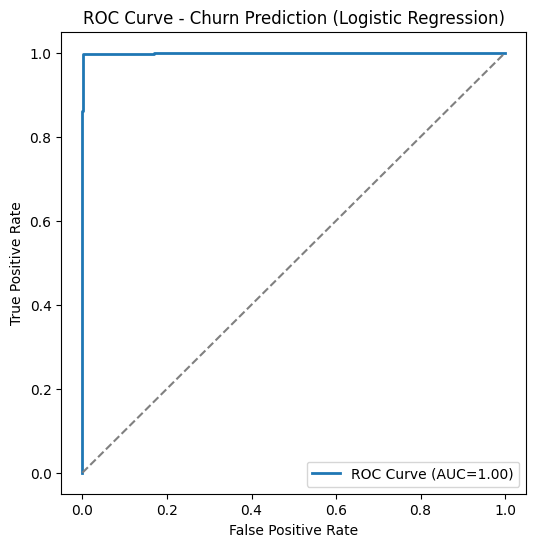

In [130]:
# 7. ROC Curve Plot
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc_score(y_test, y_proba):.2f})", linewidth=2)
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Churn Prediction (Logistic Regression)")
plt.legend()
plt.show()


In [131]:
# 8. Feature Importance
coeff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff['Abs_Coeff'] = coeff['Coefficient'].abs()
coeff = coeff.sort_values(by='Abs_Coeff', ascending=False)

print("\n🔑 Top 10 Features Driving Churn (Logistic Regression):")
print(coeff[['Feature','Coefficient']].head(10))


🔑 Top 10 Features Driving Churn (Logistic Regression):
               Feature  Coefficient
13        Complain_Yes     5.065162
1                  Age     0.794103
12  IsActiveMember_Yes    -0.567498
7         Point Earned    -0.371958
6   Satisfaction Score    -0.324083
8    Geography_Germany    -0.142241
11       HasCrCard_Yes    -0.137845
16    Card Type_SILVER     0.116724
3              Balance     0.078849
2               Tenure    -0.070351
